<a href="https://colab.research.google.com/github/sandeepbirudukota/Road-Accident-Prediction/blob/main/neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: This is a unique identifier of the accident record.

Source: Indicates source of the accident report (i.e. the API which reported the accident.).

Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordinate of the end point.

End_Lng: Shows longitude in GPS coordinate of the end point.

Distance(mi): The length of the road extent affected by the accident.

Description: Shows natural language description of the accident.

Address Attributes (9):

Number: Shows the street number in address field.

Street: Shows the street name in address field.

Side: Shows the relative side of the street (Right/Left) in address field.

City: Shows the city in address field.

County: Shows the county in address field.

State: Shows the state in address field.

Zipcode: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Weather Attributes (11):

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

POI Attributes (13):

Amenity: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way sign in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit sign in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

Stop: A POI annotation which indicates presence of stop sign in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming means in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Period-of-Day (4):

Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US_Accidents_Dec21_updated.csv")
data.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


#EDA

In [5]:
data.shape

(2845342, 47)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
data.isnull().values.sum()

3414349

In [8]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [9]:
data.nunique()


ID                       2845342
Severity                       4
Start_Time               1959333
End_Time                 2351505
Start_Lat                1093618
Start_Lng                1120365
End_Lat                  1080811
End_Lng                  1105404
Distance(mi)               14165
Description              1174563
Number                     46402
Street                    159651
Side                           3
City                       11681
County                      1707
State                         49
Zipcode                   363085
Country                        1
Timezone                       4
Airport_Code                2004
Weather_Timestamp         474214
Temperature(F)               788
Wind_Chill(F)                897
Humidity(%)                  100
Pressure(in)                1068
Visibility(mi)                76
Wind_Direction                24
Wind_Speed(mph)              136
Precipitation(in)            230
Weather_Condition            127
Amenity   

In [10]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [11]:
drop_list=[]
feature_list=[]

In [12]:
data[['Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country']]

,Number,Street,Side,City,County,State,Zipcode,Country
0,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US
1,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US
2,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US
3,NaN,I-77 N,R,Akron,Summit,OH,44311,US
4,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US
...,...,...,...,...,...,...,...,...
2845337,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US
2845338,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US
2845339,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US
2845340,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US


In [13]:
data.Severity.value_counts(normalize=False).sort_index()



1      26053
2    2532991
3     155105
4     131193
Name: Severity, dtype: int64

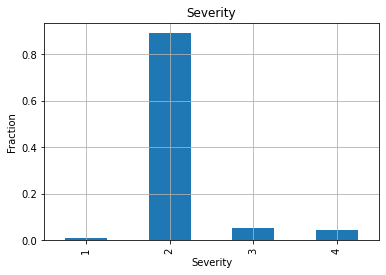

In [14]:
data.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [15]:
bool_cols = [col for col in data.columns if data[col].dtype ==np.dtype('bool')]
booldf = data[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(data)))

There are 169133 non one hot metadata rows, which are 5.9% of the data


In [16]:
bools = booldf.sum(axis=0)

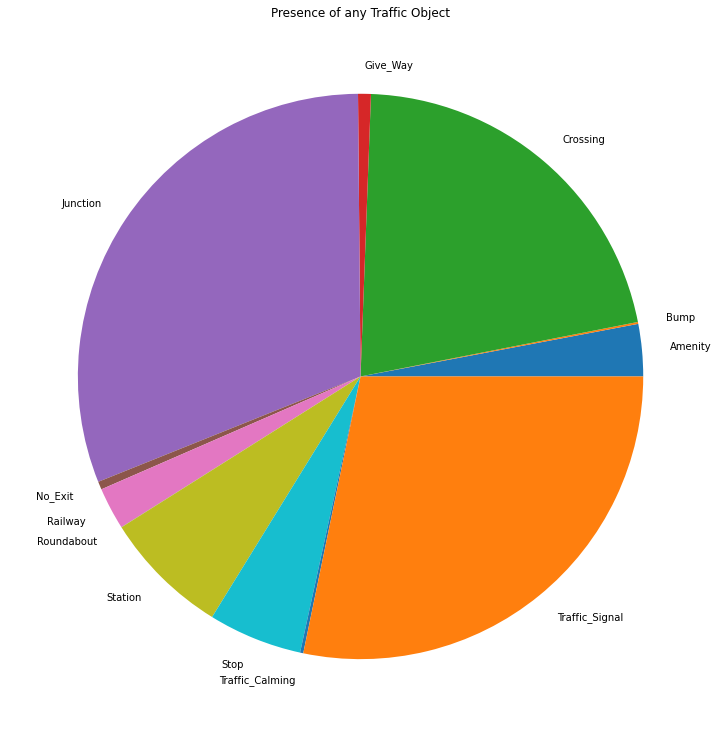

In [17]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Presence of any Traffic Object');

In [4]:
start = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(data.End_Time, format='%Y-%m-%d %H:%M:%S')

In [19]:
print(start)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]


In [20]:
print(end)

0         2016-02-08 06:37:08
1         2016-02-08 11:56:20
2         2016-02-08 12:15:39
3         2016-02-08 12:51:45
4         2016-02-08 13:53:43
                  ...        
2845337   2019-08-23 18:32:01
2845338   2019-08-23 19:38:23
2845339   2019-08-23 19:28:49
2845340   2019-08-23 19:29:42
2845341   2019-08-23 19:21:31
Name: End_Time, Length: 2845342, dtype: datetime64[ns]


In [21]:
print(end-start)

0         0 days 06:00:00
1         0 days 06:00:00
2         0 days 06:00:00
3         0 days 06:00:00
4         0 days 06:00:00
                ...      
2845337   0 days 00:28:36
2845338   0 days 00:26:53
2845339   0 days 00:28:28
2845340   0 days 00:29:21
2845341   0 days 00:29:25
Length: 2845342, dtype: timedelta64[ns]


top 20 accident durations correspond to 42.8% of the data


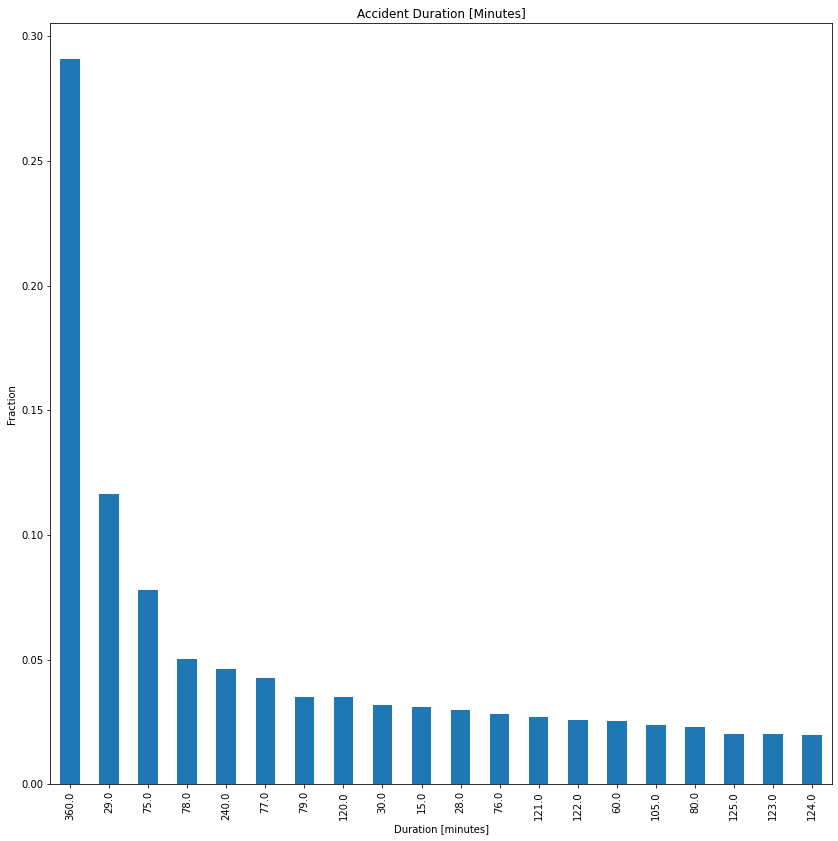

In [5]:
diff = (end-start)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [6]:
data['Weekday'] = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S').dt.day_name()

In [9]:
data


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,Monday
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,Monday
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,Monday
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,Monday
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,Friday
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,Friday
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,Day,Day,Day,Day,Friday
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,Friday


In [7]:
 data['time'] = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
 data = data.set_index('time')
 data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 05:56:20,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 06:15:39,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:51:45,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,Monday
2016-02-08 07:53:43,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,Monday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """


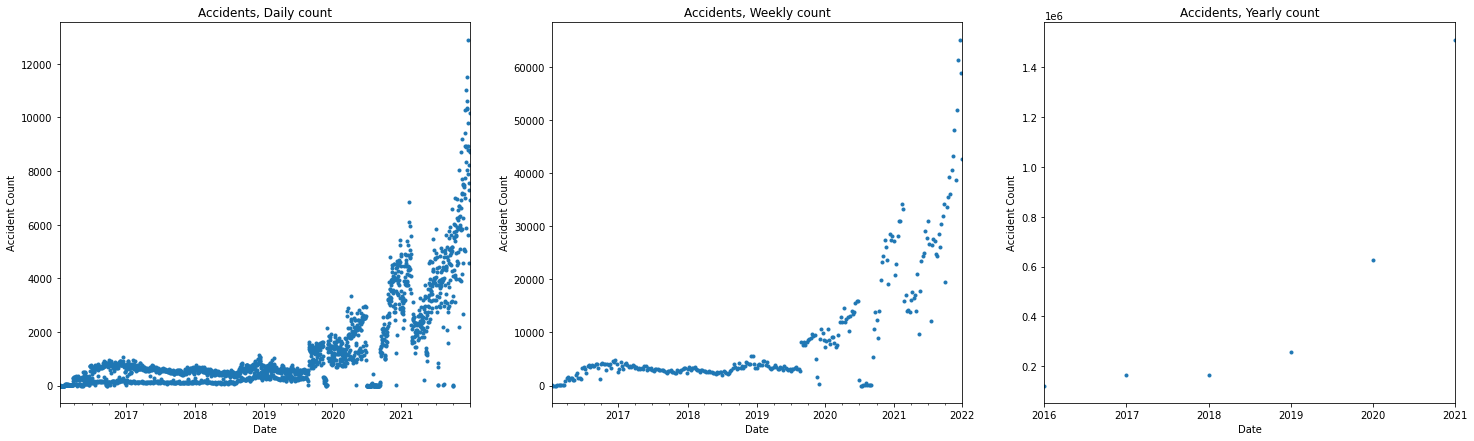

In [8]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(25,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = data.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

In [27]:
# data['date'] = data['time'].dt.date

In [28]:
# data = data.reset_index()
# data['Weekday'] = data['time'].dt.dayofweek
# data

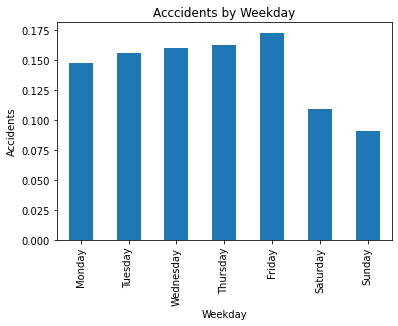

In [9]:
weekday = data.groupby('Weekday').ID.count()
weekday = weekday/weekday.sum()
dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[dayOfWeek].plot.bar()
plt.title('Acccidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Accidents');

In [10]:
def plotCorrelationMatrix(data, graphWidth):
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


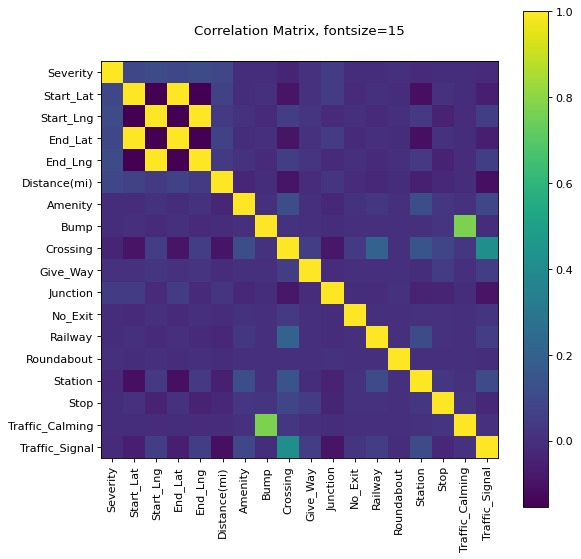

In [31]:
plotCorrelationMatrix(data, 8)

In [32]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [11]:
daa = data.copy()
daa.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [34]:
missing_percent = daa.isna().sum().sort_values(ascending = False)/len(data)
missing_percent

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Sunrise_Sunset           1.007612e-03
Civil_Twilight           1.007612e-03
Nautical_Twilight        1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Junction                 0.000000e+00
Railway                  0.000000e+00
No_Exit                  0.000000e+00
Crossing                 0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop        

In [35]:
missing_percent[missing_percent != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Sunrise_Sunset           1.007612e-03
Civil_Twilight           1.007612e-03
Nautical_Twilight        1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

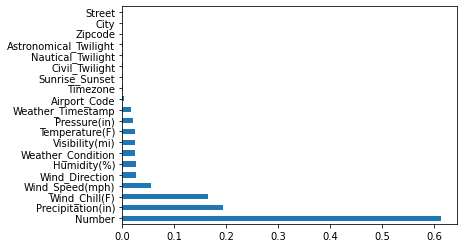

In [36]:
missing_percent[missing_percent != 0].plot(kind = 'barh')

In [12]:
daa['Street'].nunique()

159651

#Replacing Nulls and Removing columns

In [13]:
doo = daa.drop(['ID','Distance(mi)', 'Start_Time', 'End_Time','Number', 'Timezone','Weather_Timestamp', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code',
'Start_Lat',	'Start_Lng', 	'End_Lat',	'End_Lng', 'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight' ], axis=1)

In [14]:
doo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2845342 entries, 2016-02-08 00:37:08 to 2019-08-23 18:52:06
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Temperature(F)     float64
 2   Wind_Chill(F)      float64
 3   Humidity(%)        float64
 4   Pressure(in)       float64
 5   Visibility(mi)     float64
 6   Wind_Direction     object 
 7   Wind_Speed(mph)    float64
 8   Precipitation(in)  float64
 9   Weather_Condition  object 
 10  Amenity            bool   
 11  Bump               bool   
 12  Crossing           bool   
 13  Give_Way           bool   
 14  Junction           bool   
 15  No_Exit            bool   
 16  Railway            bool   
 17  Roundabout         bool   
 18  Station            bool   
 19  Stop               bool   
 20  Traffic_Calming    bool   
 21  Traffic_Signal     bool   
 22  Turning_Loop       bool   
 23  Sunrise_Sunset     object 
 24  Weekday          

In [15]:
doo.head(5)

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,...,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 05:56:20,2,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,...,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 06:15:39,2,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,...,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 06:51:45,2,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,...,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 07:53:43,3,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,...,False,False,False,False,False,False,False,False,Day,Monday


In [16]:
doo.isnull().sum()

Severity                  0
Temperature(F)        69274
Wind_Chill(F)        469643
Humidity(%)           73092
Pressure(in)          59200
Visibility(mi)        70546
Wind_Direction        73775
Wind_Speed(mph)      157944
Precipitation(in)    549458
Weather_Condition     70636
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset         2867
Weekday                   0
dtype: int64

In [17]:
doo.nunique()


Severity                4
Temperature(F)        788
Wind_Chill(F)         897
Humidity(%)           100
Pressure(in)         1068
Visibility(mi)         76
Wind_Direction         24
Wind_Speed(mph)       136
Precipitation(in)     230
Weather_Condition     127
Amenity                 2
Bump                    2
Crossing                2
Give_Way                2
Junction                2
No_Exit                 2
Railway                 2
Roundabout              2
Station                 2
Stop                    2
Traffic_Calming         2
Traffic_Signal          2
Turning_Loop            1
Sunrise_Sunset          2
Weekday                 7
dtype: int64

In [18]:
pmean = doo['Pressure(in)'].mean()
tmean = doo['Temperature(F)'].mean()
wcmean = doo['Wind_Chill(F)'].mean()
hmean = doo['Humidity(%)'].mean()
wsmean = doo['Wind_Speed(mph)'].mean()
prmean = doo['Precipitation(in)'].mean()

In [19]:
doo['Pressure(in)']=doo['Pressure(in)'].fillna(pmean)
doo['Temperature(F)'] = doo['Temperature(F)'].fillna(tmean)
doo['Wind_Chill(F)'] = doo['Wind_Chill(F)'].fillna(wcmean)
doo['Humidity(%)'] = doo['Humidity(%)'].fillna(hmean)
doo['Wind_Speed(mph)'] = doo['Wind_Speed(mph)'].fillna(wsmean)
doo['Precipitation(in)']=doo['Precipitation(in)'].fillna(prmean)

In [20]:
doo.isnull().sum()

Severity                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       70546
Wind_Direction       73775
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    70636
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset        2867
Weekday                  0
dtype: int64

In [21]:
doo['Visibility(mi)'] = doo['Visibility(mi)'].fillna(doo['Visibility(mi)'].mode()[0])
doo['Wind_Direction'] = doo['Wind_Direction'].fillna(doo['Wind_Direction'].mode()[0])
doo['Weather_Condition'] = doo['Weather_Condition'].fillna(doo['Weather_Condition'].mode()[0])
doo['Sunrise_Sunset'] = doo['Sunrise_Sunset'].fillna(doo['Sunrise_Sunset'].mode()[0])


In [22]:
doo.isnull().sum()

Severity             0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
Weekday              0
dtype: int64

In [32]:
df1=doo.copy()

#encoding

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,42.1,36.100000,58.0,29.76,10.0,SW,10.400000,0.000000,Light Rain,...,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 05:56:20,2,36.9,59.658231,91.0,29.68,10.0,Calm,7.395044,0.020000,Light Rain,...,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:15:39,2,36.0,59.658231,97.0,29.70,10.0,Calm,7.395044,0.020000,Overcast,...,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:51:45,2,39.0,59.658231,55.0,29.65,10.0,Calm,7.395044,0.007017,Overcast,...,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 07:53:43,3,37.0,29.800000,93.0,29.69,10.0,WSW,10.400000,0.010000,Light Rain,...,0,0,0,0,0,0,0,0,Day,Monday


In [34]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1['Weekday'] = label_encoder.fit_transform(df1['Weekday'])
df1.head()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,42.1,36.100000,58.0,29.76,10.0,16,10.400000,0.000000,56,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 05:56:20,2,36.9,59.658231,91.0,29.68,10.0,1,7.395044,0.020000,56,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,2,36.0,59.658231,97.0,29.70,10.0,1,7.395044,0.020000,79,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:51:45,2,39.0,59.658231,55.0,29.65,10.0,1,7.395044,0.007017,79,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 07:53:43,3,37.0,29.800000,93.0,29.69,10.0,22,10.400000,0.010000,56,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# dict = {'Monday' : 1, 'Tuesday' : 1, 'Wednesday' : 1, 'Thursday' : 1, 'Friday': 1, 'Saturday':0,'Sunday':0}
# df1.replace({"Weekday": dict})


In [36]:
Y = df1['Severity']

In [37]:
X = df1.drop(['Severity'], axis = 1)

In [38]:
X.dtypes

Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction         int64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition      int64
Amenity                int64
Bump                   int64
Crossing               int64
Give_Way               int64
Junction               int64
No_Exit                int64
Railway                int64
Roundabout             int64
Station                int64
Stop                   int64
Traffic_Calming        int64
Traffic_Signal         int64
Turning_Loop           int64
Sunrise_Sunset         int64
Weekday                int64
dtype: object

In [39]:
X.head(5)

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,42.1,36.100000,58.0,29.76,10.0,16,10.400000,0.000000,56,0,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 05:56:20,36.9,59.658231,91.0,29.68,10.0,1,7.395044,0.020000,56,0,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,36.0,59.658231,97.0,29.70,10.0,1,7.395044,0.020000,79,0,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:51:45,39.0,59.658231,55.0,29.65,10.0,1,7.395044,0.007017,79,0,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 07:53:43,37.0,29.800000,93.0,29.69,10.0,22,10.400000,0.010000,56,0,...,0,0,0,0,0,0,0,0,0,1


#scaling and logistic regression

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.fit_transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.772910,0.845637,-0.547618,0.336133,0.325847,0.663106,-0.443112,-0.086923,-0.661513,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,-0.753788,-1.432196
1,1.207698,0.000830,0.515311,0.529448,0.325847,0.395559,-0.720983,0.000642,1.847021,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,-0.753788,0.457405
2,0.718562,0.793941,1.401086,0.423125,0.325847,0.796880,-0.443112,-0.086923,1.275456,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,3.118249,0.0,-0.753788,-0.959796
3,-1.509725,-1.894259,1.002487,-3.945782,-2.274821,-0.005762,1.779860,-0.086923,0.894413,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,-0.753788,-0.014995
4,-1.835816,-2.049348,-0.591907,-5.182995,0.325847,0.796880,0.112631,-0.086923,1.434224,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,1.326633,-0.487396


In [46]:
y_train.unique()

array([2, 3, 4, 1])

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(scalar_train, y_train) 

In [48]:
from sklearn.preprocessing import StandardScaler
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [49]:
y_pred = clf.predict(scalar_test)

In [50]:
clf.score(scalar_train, y_train)

0.8900312045172086

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8903753323410694

#neural network

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.772910,0.845637,-0.547618,0.336133,0.325847,0.663106,-0.443112,-0.086923,-0.661513,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,-0.753788,-1.432196
1,1.207698,0.000830,0.515311,0.529448,0.325847,0.395559,-0.720983,0.000642,1.847021,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,-0.753788,0.457405
2,0.718562,0.793941,1.401086,0.423125,0.325847,0.796880,-0.443112,-0.086923,1.275456,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,3.118249,0.0,-0.753788,-0.959796
3,-1.509725,-1.894259,1.002487,-3.945782,-2.274821,-0.005762,1.779860,-0.086923,0.894413,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,-0.753788,-0.014995
4,-1.835816,-2.049348,-0.591907,-5.182995,0.325847,0.796880,0.112631,-0.086923,1.434224,-0.099438,...,-0.038944,-0.089414,-0.006528,-0.15628,-0.134306,-0.024414,-0.320693,0.0,1.326633,-0.487396


In [42]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [43]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='adam', alpha=0.0001,
                    hidden_layer_sizes=(20, 20, 20), random_state=1,max_iter=200,learning_rate_init=0.001)

In [44]:
clf_MLP.fit(scalar_train, y_train) 

MLPClassifier(hidden_layer_sizes=(20, 20, 20), random_state=1)

In [45]:
y_pred=clf_MLP.predict(scalar_test) 

In [46]:
clf_MLP.score(scalar_test,y_test)

0.891331279686646